In [1]:
import pandas as pd

In [6]:
rep = pd.read_csv('/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/mabs_assemblies/final_trash/Ceb_d_v2_centromere_repeats.bed', sep="\t", header=None)
rep=rep.rename(columns={0: "scaff", 1: "start", 2: "end", 3: "length", 4: "seq"})
rep.head()

,scaff,start,end,length,seq
0,scaffold_1,23279874,23280027,154,ACCTGATGGGGTGGTTTAACAGAGGGGAGTCCCTATGAATTTTTTT...
1,scaffold_1,23280028,23280195,168,AAGCTTATTATGGTTTCCACAAGTTTTGTAAGTGAGGACGAAGTCC...
2,scaffold_1,23280196,23280363,168,AAGCTTATTATGGCTTCCCCATGTTTTGTAAGGGATGACGAAGTCC...
3,scaffold_1,23280364,23280532,169,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGAGAGGACGAAGTCC...
4,scaffold_1,23280533,23280700,168,AAGCTTATTATGGCTCTCAAAAGTTTTGTAAGTGAGGACGAAGTCC...


<AxesSubplot: ylabel='Frequency'>

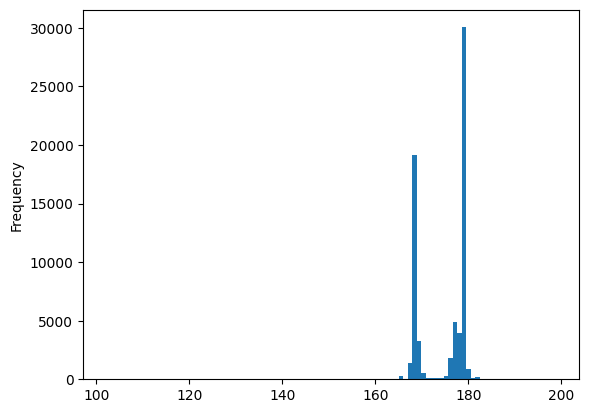

In [10]:
rep.length[(rep.length > 100) & (rep.length < 200)].plot.hist(bins=100)

<AxesSubplot: ylabel='Frequency'>

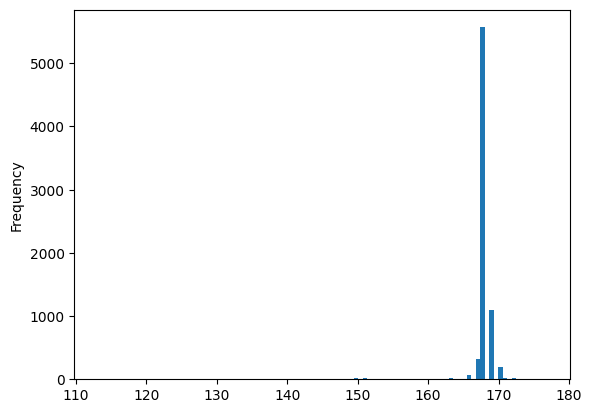

In [13]:
rep.length[(rep.scaff == "scaffold_2")].plot.hist(bins=100)

In [24]:
repeat_val = rep[rep.scaff == "scaffold_1"]["seq"].value_counts().to_frame()

In [97]:
rep = rep[(rep.length > 100)]

In [98]:
samp = 'WS1'
for i in range(1,9):
    col_name = samp + "_scaffold_" + str(i)
    repeat_val2 = rep[rep.scaff == "scaffold_" + str(i)]["seq"].value_counts().to_frame()
    repeat_val2 = repeat_val2.reset_index()
    repeat_val2 = repeat_val2.rename(columns={"index": "sequence", "seq": col_name})
    repeat_val = repeat_val.merge(repeat_val2, on="sequence", how='outer')

In [7]:
samp = 'Ceb_d'
for i in range(6,7):
    col_name = samp + "_scaffold_" + str(i)
    repeat_val2 = rep[rep.scaff == "scaffold_" + str(i)]["seq"].value_counts().to_frame()
    repeat_val2 = repeat_val2.reset_index()
    repeat_val2 = repeat_val2.rename(columns={"index": "sequence", "seq": col_name})
    repeat_val = repeat_val.merge(repeat_val2, on="sequence", how='outer')

In [8]:
repeat_val 

,sequence,al1_scaffold_1,al1_scaffold_2,al1_scaffold_3,al1_scaffold_4,al1_scaffold_5,al1_scaffold_6,al1_scaffold_7,al1_scaffold_8,AL08_scaffold_1,...,Ped_scaffold_8,WS1_scaffold_1,WS1_scaffold_2,WS1_scaffold_3,WS1_scaffold_4,WS1_scaffold_5,WS1_scaffold_6,WS1_scaffold_7,WS1_scaffold_8,Ceb_d_scaffold_6
0,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCCGTTTTGGA...,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AATCTTTTTGGGTGTGGCCGAAGTCGTATGAGTTTTCGGTTTTGGA...,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566888,AAGCTTATTATGGAATCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
566889,AAGCTTATTATGTCTTCCCCAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
566890,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
566891,AAGCTTATTATGTCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [9]:
repeat_val.to_csv("/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/mabs_assemblies/final_trash/big_monomere_table2.tsv", sep="\t", index=False)


In [27]:
repeat_val = repeat_val.reset_index()
repeat_val = repeat_val.rename(columns={"index": "sequence", "seq": "al1_scaffold_1_count"})

In [2]:
repeat_all = pd.read_csv("/netscratch/dep_mercier/grp_novikova/A.Lyrata/anna_g/mabs_assemblies/final_trash/big_monomere_table.tsv", sep="\t")
repeat_all


,sequence,al1_scaffold_1,al1_scaffold_2,al1_scaffold_3,al1_scaffold_4,al1_scaffold_5,al1_scaffold_6,al1_scaffold_7,al1_scaffold_8,AL08_scaffold_1,...,Ped_scaffold_7,Ped_scaffold_8,WS1_scaffold_1,WS1_scaffold_2,WS1_scaffold_3,WS1_scaffold_4,WS1_scaffold_5,WS1_scaffold_6,WS1_scaffold_7,WS1_scaffold_8
0,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,323.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,189.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCCGTTTTGGA...,133.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AATCTTTTTGGGTGTGGCCGAAGTCGTATGAGTTTTCGGTTTTGGA...,97.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558365,AAGCTTATTATGGCTTCTCCAAGTTTTCTAAGAGAGGACAAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
558366,AAGCTTATTATGGTTTCTCCAAGTTTTCTAAGAGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
558367,AAGCTTATTATGGGTTCTCCAAGTTTTGTAAGGGAGGACAAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
558368,AAGCTTATTATGGCTTCTCCATGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [4]:
repeat_val = repeat_all.drop(columns=["Ceb_d_scaffold_6"])

In [11]:
repeat_all = repeat_all.fillna(0)

In [12]:
repeat_all_sc1 = repeat_all.loc[:,['sequence','al1_scaffold_6',
 'AL08_scaffold_6',
 'AL27_scaffold_6',
 'BOR_scaffold_6',
 'BAM12_scaffold_6',
 'Ceb_c_scaffold_6',
 'Ceb_d_scaffold_6',
 'PTP_scaffold_6',
 'LPT_scaffold_6',
 'TSS_scaffold_6',
 'MN47_scaffold_6',
 'NT1_scaffold_6',
 'NT12_scaffold_6',
 'NT8_scaffold_6',
 'NT9_scaffold_6',
 'PU6_scaffold_6',
 'TE11_scaffold_6',
 'TE4_scaffold_6',
 'TE8_scaffold_6',
 'Ped_scaffold_6',
 'WS1_scaffold_6',]]

In [107]:
list(repeat_all.columns)

['sequence',
 'al1_scaffold_1',
 'al1_scaffold_2',
 'al1_scaffold_3',
 'al1_scaffold_4',
 'al1_scaffold_5',
 'al1_scaffold_6',
 'al1_scaffold_7',
 'al1_scaffold_8',
 'AL08_scaffold_1',
 'AL08_scaffold_2',
 'AL08_scaffold_3',
 'AL08_scaffold_4',
 'AL08_scaffold_5',
 'AL08_scaffold_6',
 'AL08_scaffold_7',
 'AL08_scaffold_8',
 'AL27_scaffold_1',
 'AL27_scaffold_2',
 'AL27_scaffold_3',
 'AL27_scaffold_4',
 'AL27_scaffold_5',
 'AL27_scaffold_6',
 'AL27_scaffold_7',
 'AL27_scaffold_8',
 'BOR_scaffold_1',
 'BOR_scaffold_2',
 'BOR_scaffold_3',
 'BOR_scaffold_4',
 'BOR_scaffold_5',
 'BOR_scaffold_6',
 'BOR_scaffold_7',
 'BOR_scaffold_8',
 'BAM12_scaffold_1',
 'BAM12_scaffold_2',
 'BAM12_scaffold_3',
 'BAM12_scaffold_4',
 'BAM12_scaffold_5',
 'BAM12_scaffold_6',
 'BAM12_scaffold_7',
 'BAM12_scaffold_8',
 'Ceb_c_scaffold_1',
 'Ceb_c_scaffold_2',
 'Ceb_c_scaffold_3',
 'Ceb_c_scaffold_4',
 'Ceb_c_scaffold_5',
 'Ceb_c_scaffold_6',
 'Ceb_c_scaffold_7',
 'Ceb_c_scaffold_8',
 'Ceb_d_scaffold_1',
 'Ceb_

In [115]:
repeat_all_sc1 = repeat_all_sc1[repeat_all_sc1.iloc[:,1:].sum(axis=1) > 0]

In [114]:
repeat_all_sc1[repeat_all_sc1.iloc[:,1:].sum(axis=1) > 0]

,sequence,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1
0,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,323.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,189.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCGGTTTTGGA...,153.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTTCCGTTTTGGA...,133.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,AATCTTTTTGGGTGTGGCCGAAGTCGTATGAGTTTTCGGTTTTGGA...,97.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
537854,AATCTTTGTGGGTGTGGCCGAAGTCCTATGAGTTTCGGTTTTGGAG...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
537855,AATCTTTGTGGGTGTGACCGAAGTCCTATGAGTTTTCGGTTGTGGA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
537856,AATATTTGTGGGTGTAGCCGAAGTCTTATGAGTTTTCTGTTTTGGA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
537857,AATCTTTGTGGGTGTGACCGAAGTCCTATGAGTTTTCGGTTGTGGA...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [117]:
repeat_all_sc1.

AttributeError: 'PlotAccessor' object has no attribute 'heatmap'

In [13]:
import seaborn as sns

<AxesSubplot: >

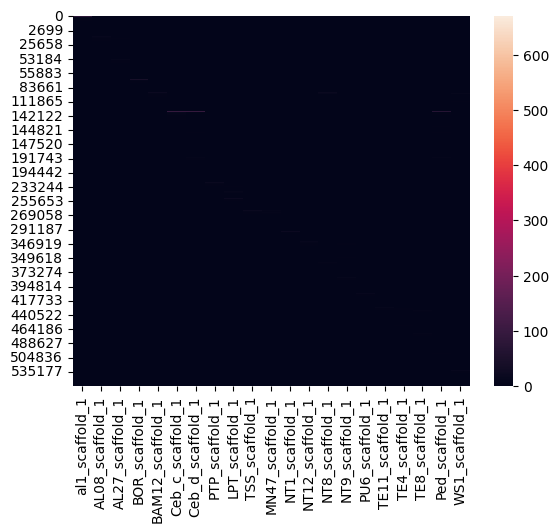

In [120]:
sns.heatmap(repeat_all_sc1.iloc[:,1:])

In [14]:
from scipy.spatial.distance import euclidean, pdist, squareform

sq = squareform(pdist(repeat_all_sc1.iloc[:,1:].transpose(), metric='euclidean'))

In [126]:
DF_euclid = pd.DataFrame(sq, columns=repeat_all_sc1.columns[1:], index=repeat_all_sc1.columns[1:])

<AxesSubplot: >

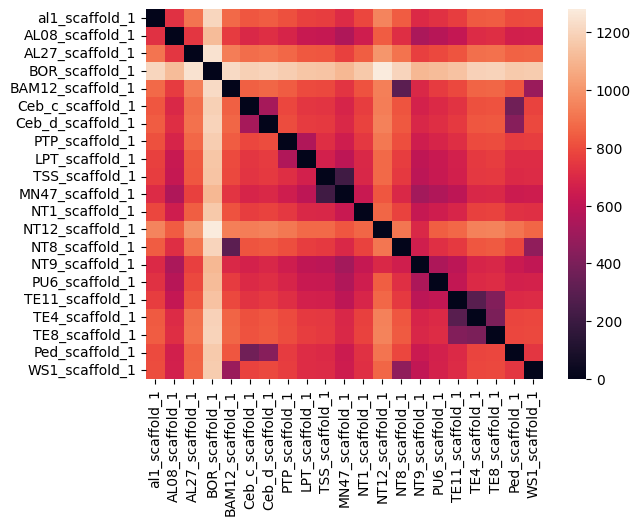

In [128]:
sns.heatmap(DF_euclid)

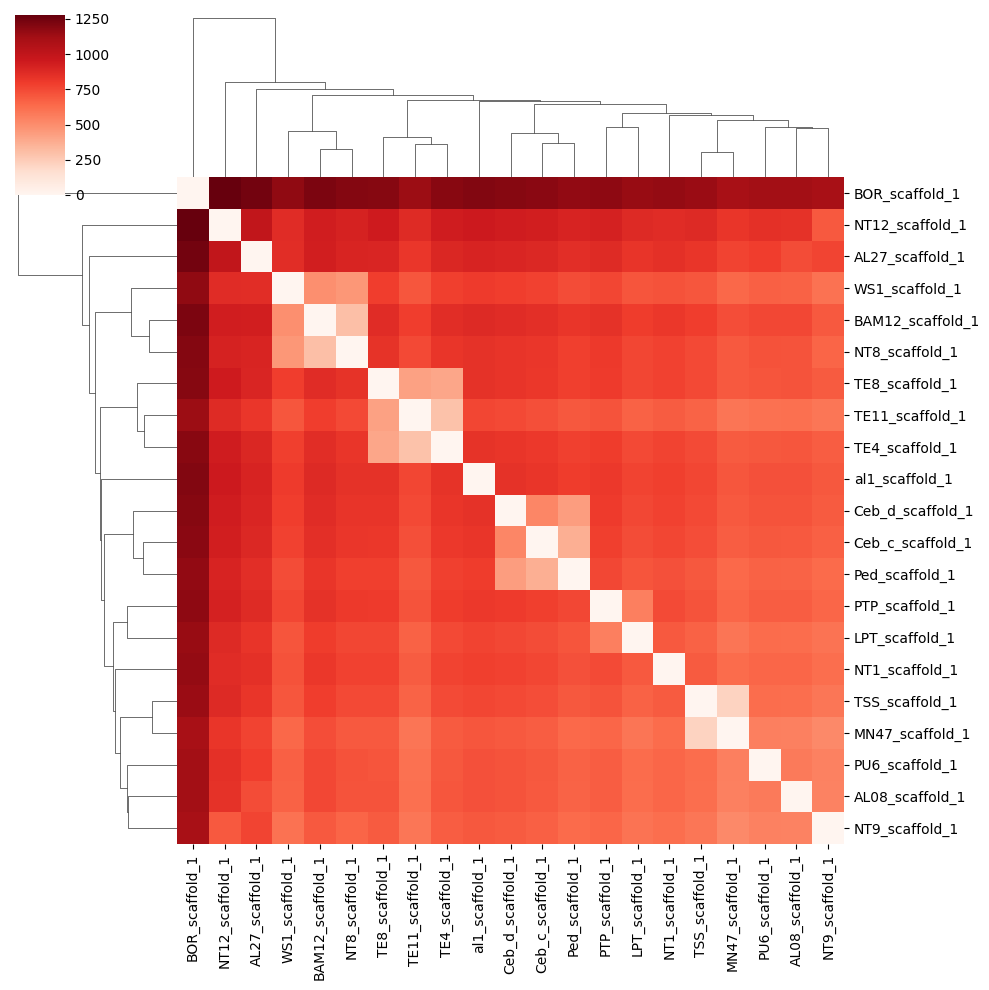

In [132]:
sns.clustermap(DF_euclid, cmap='Reds')

In [16]:
repeat_all_sc1 = repeat_all_sc1[repeat_all_sc1.iloc[:,1:].sum(axis=1) > 0]
sq = squareform(pdist(repeat_all_sc1.iloc[:,1:].transpose(), metric='euclidean'))
DF_euclid = pd.DataFrame(sq, columns=repeat_all_sc1.columns[1:], index=repeat_all_sc1.columns[1:])

/home/aglushkevich/.local/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


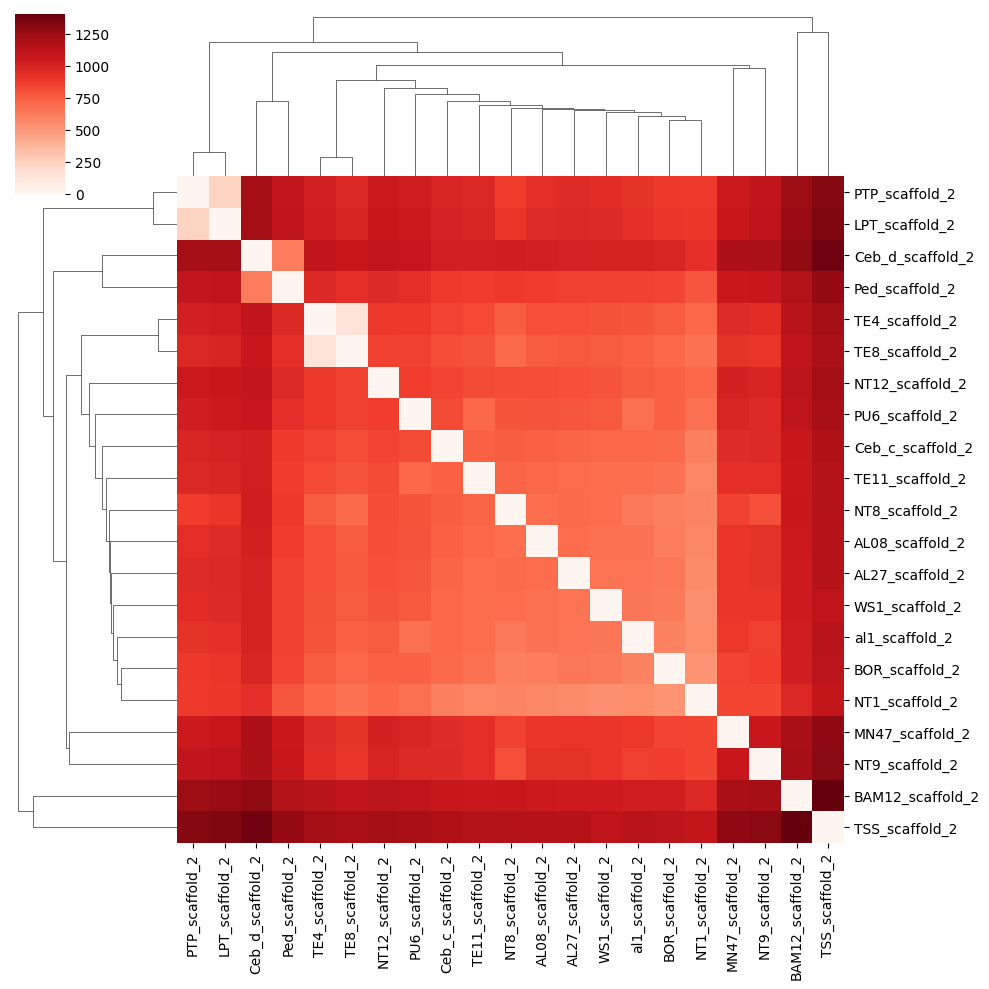

In [136]:
sns.clustermap(DF_euclid, cmap='Reds')

/home/aglushkevich/.local/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


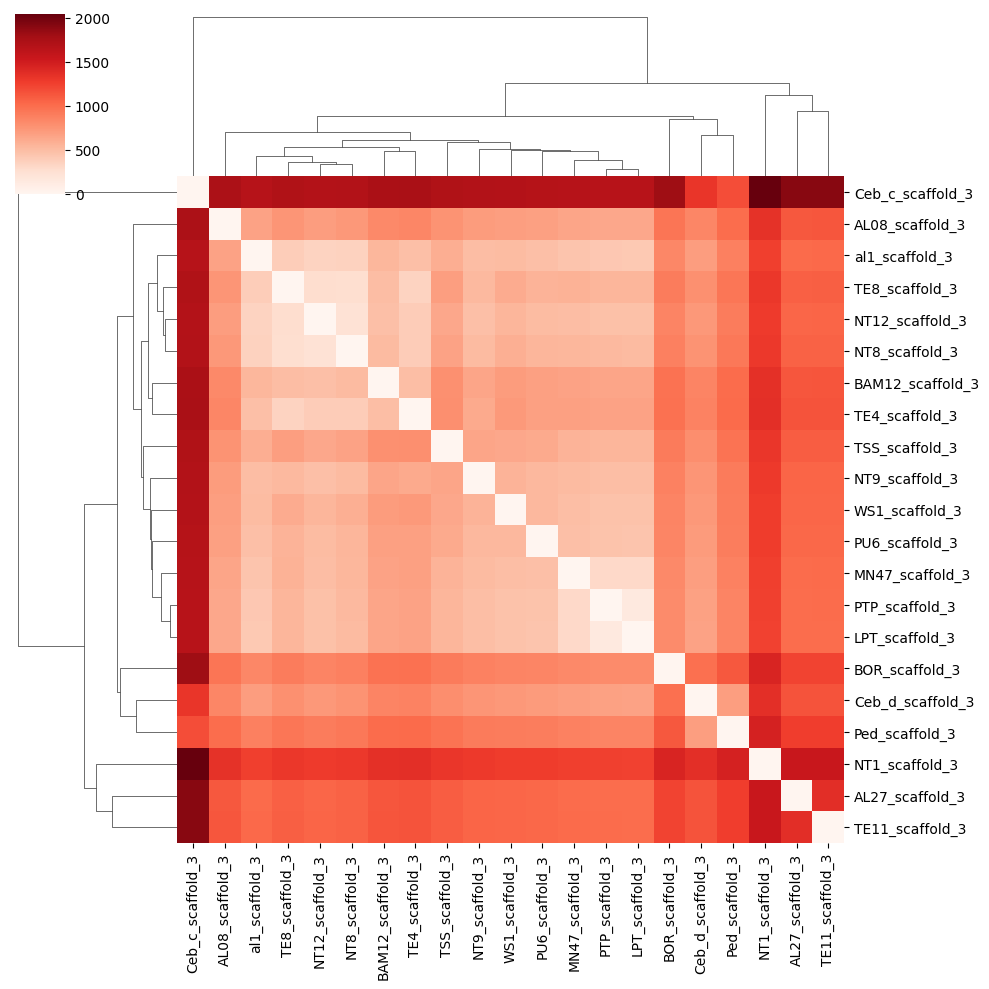

In [139]:
sns.clustermap(DF_euclid, cmap='Reds')

/home/aglushkevich/.local/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


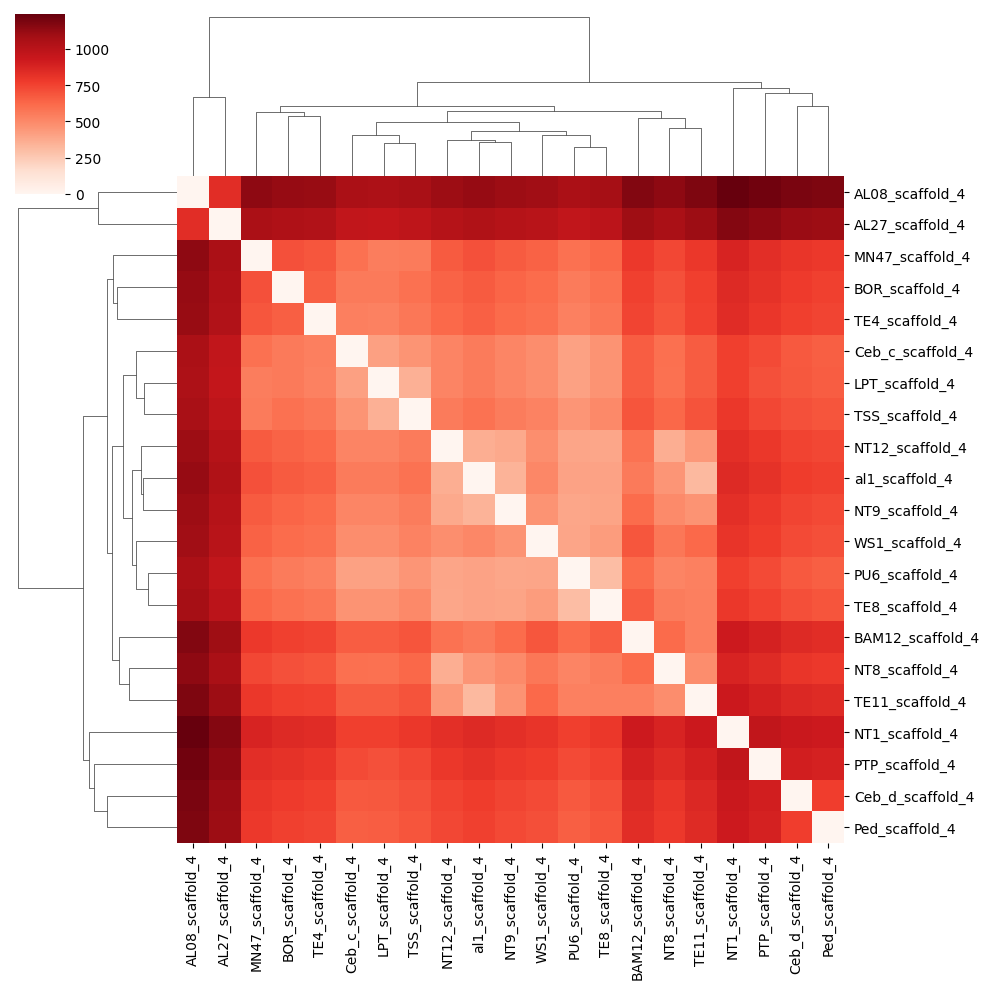

In [142]:
sns.clustermap(DF_euclid, cmap='Reds')

/home/aglushkevich/.local/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


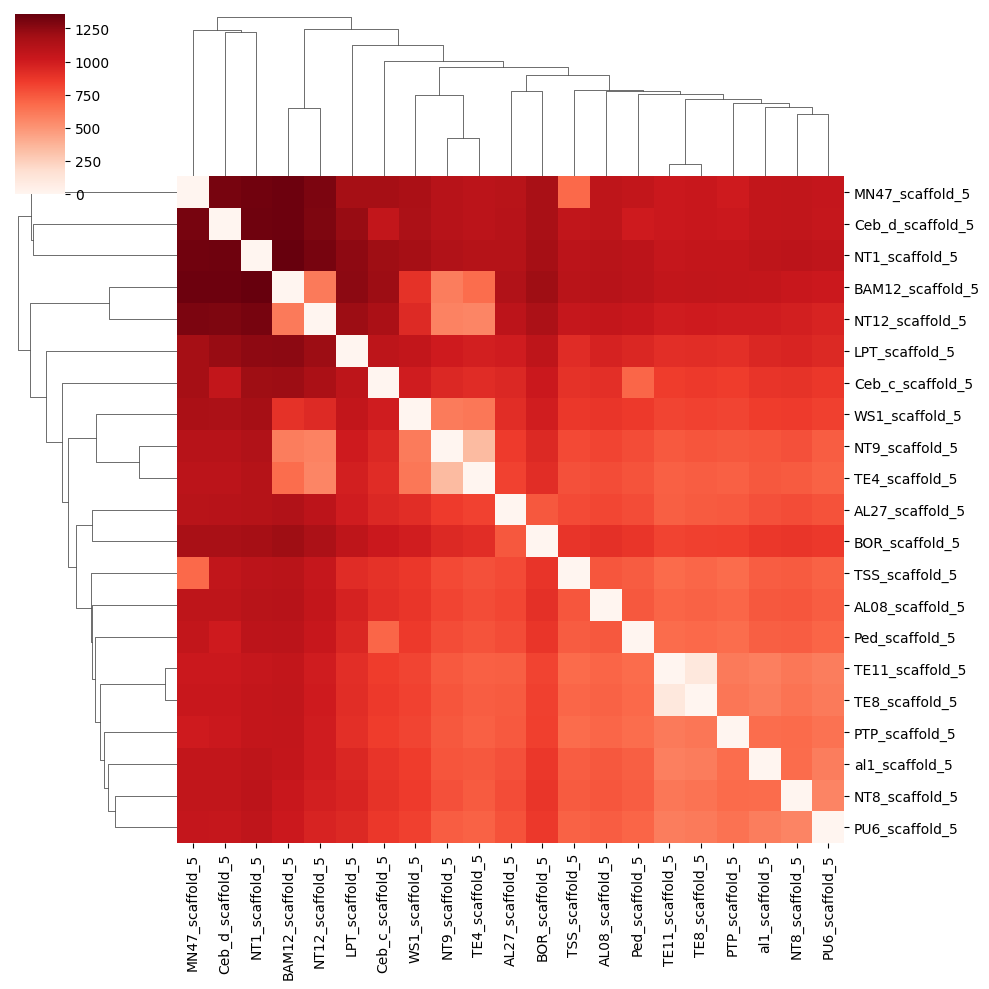

In [145]:
sns.clustermap(DF_euclid, cmap='Reds')

/home/aglushkevich/.local/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


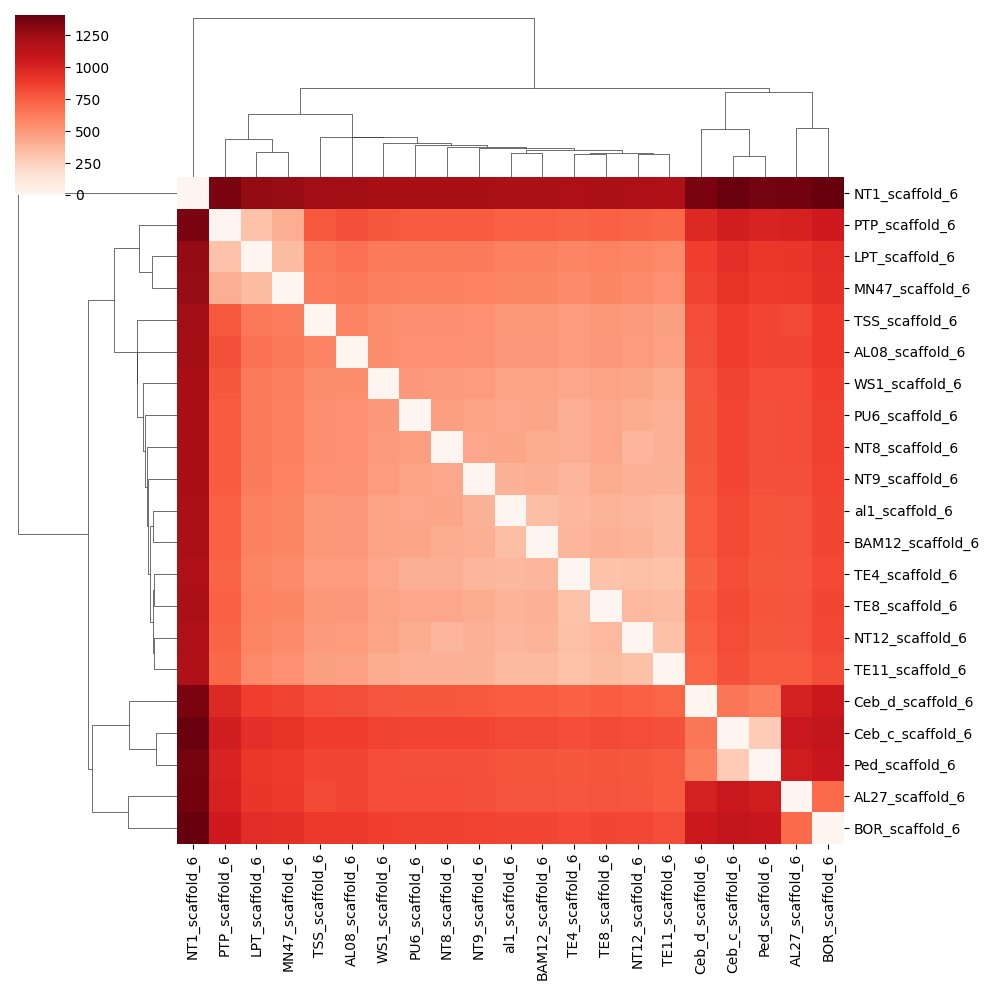

In [17]:
sns.clustermap(DF_euclid, cmap='Reds')

/home/aglushkevich/.local/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


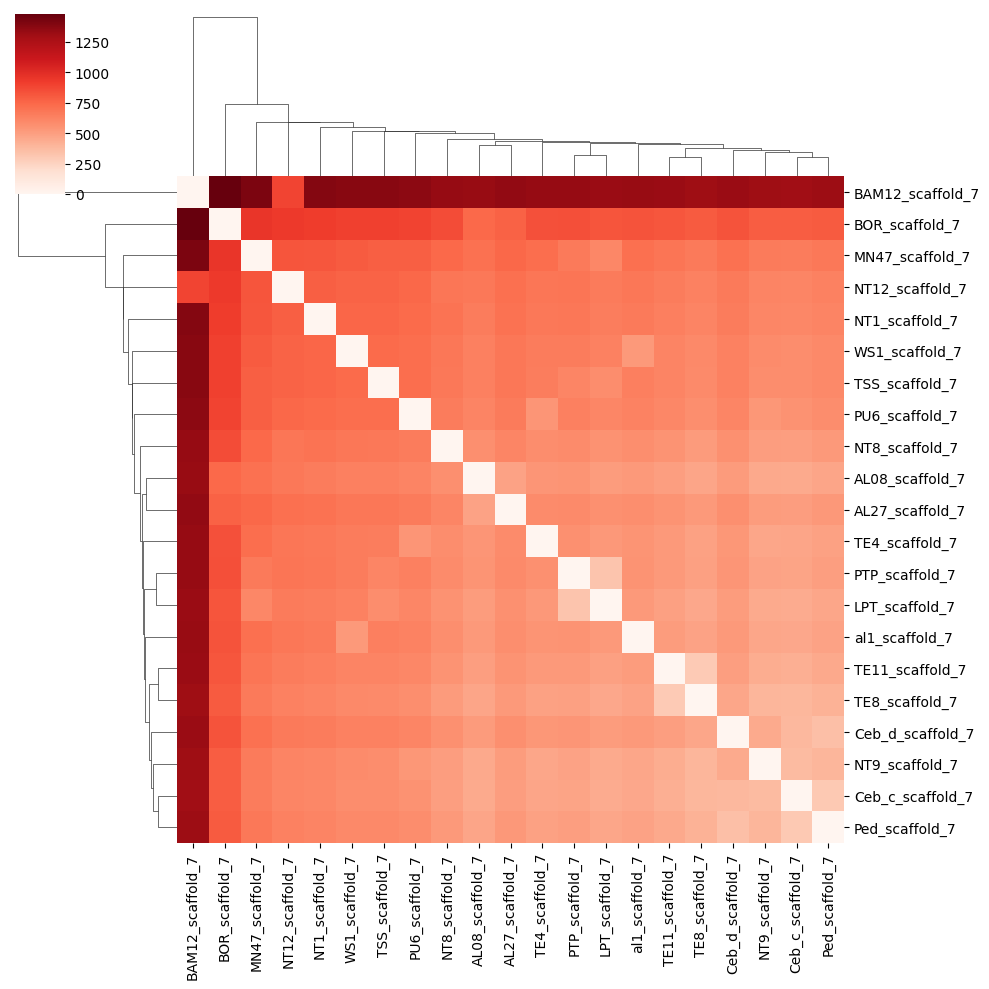

In [151]:
sns.clustermap(DF_euclid, cmap='Reds')

/home/aglushkevich/.local/lib/python3.10/site-packages/seaborn/matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


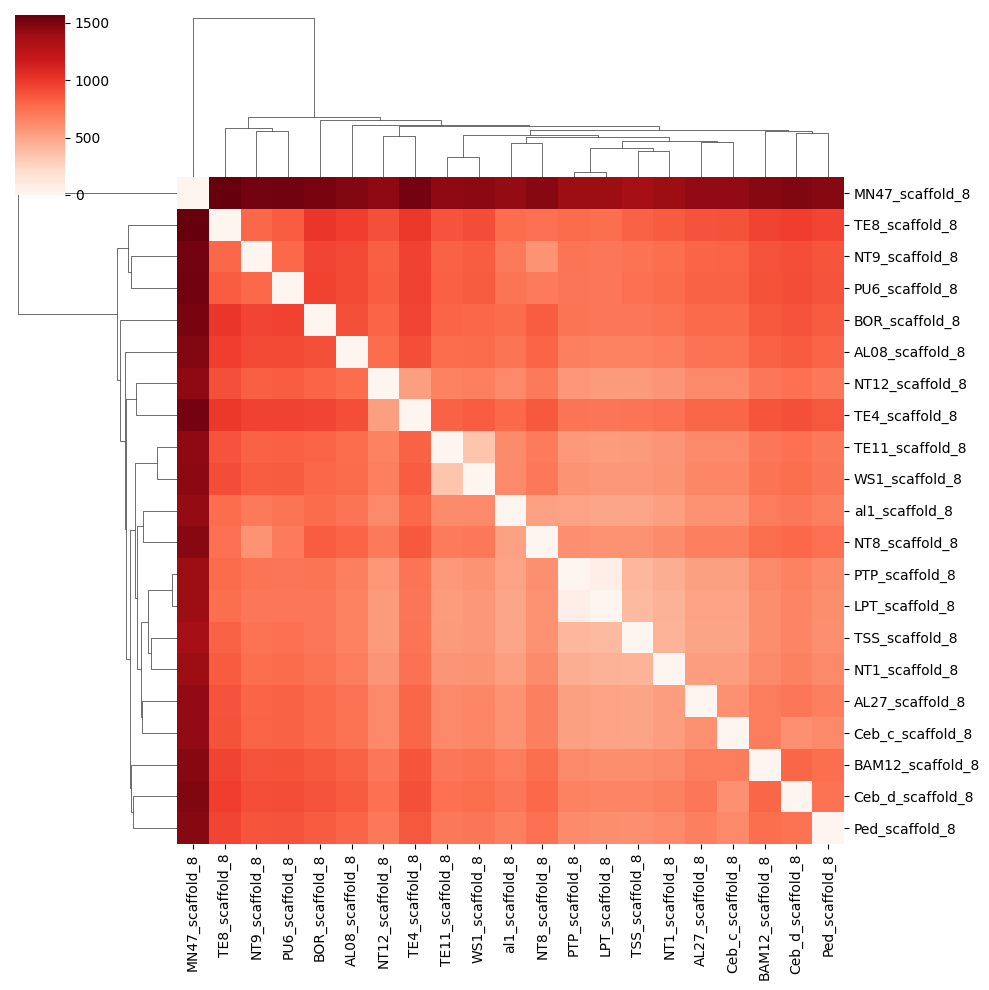

In [154]:
sns.clustermap(DF_euclid, cmap='Reds')

In [1]:
def simple_rev(s,n):
    dictionary = {}
    total = 0
    rev_s = Seq(s).reverse_complement()
    for i in range(len(s)-(n-1)): # (n-1) to get last element
        k = i+n
        if s[i:k] in dictionary:
            dictionary[s[i:k]] += 1
        else:
            dictionary.update({s[i:k]:1})
        total += 1 # doing it here to avoid sum(dictionary.values())
        if str(rev_s[i:k]) in dictionary:
            dictionary[str(rev_s[i:k])] += 1    
        else:
            dictionary.update({str(rev_s[i:k]):1})
        total += 1 # doing it here to avoid sum(dictionary.values())
    for key, value in dictionary.items():
        dictionary[key] = value/total
    # As a challenge, edit the line above to lambda function
    return dictionary

In [4]:
from Bio.Seq import Seq
kmer_tab = pd.DataFrame()
with open("mabs_assemblies/final_trash/All_centromere_repeats_kindapAge1.bed") as monotab:
    for monomer in monotab.readlines():
        monomer = monomer.split("\t")
        seq_name = "pAge1_" + monomer[0] + monomer[5]
        monomer = monomer[4]
        #print(monomer)
        kmer_dict = simple_rev(monomer,5)
        for a, i in kmer_dict.items():
            kmer_tab.loc[seq_name, a] = i

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.co

/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_7802/906607684.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i


IndexError: list index out of range

In [4]:
def simple(s,n):
    dictionary = {}
    total = 0
    for i in range (len(s)-(n-1)): # (n-1) to get last element
        k = i+n
        if s[i:k] in dictionary:
            dictionary[s[i:k]] += 1
        else:
            dictionary.update({s[i:k]:1})
        total += 1 # doing it here to avoid sum(dictionary.values())

    for key, value in dictionary.items():
        dictionary[key] = value/total
    # As a challenge, edit the line above to lambda function
    return dictionary



In [5]:
kmer_tab = pd.DataFrame()
with open("mabs_assemblies/final_trash/WS1_v2_centromere_repeats.bed") as monotab:
    for monomer in monotab.readlines():
        monomer = monomer.split("\t")
        if monomer[0] != 'scaffold_1':
            break
        seq_name = "pAa_" + monomer[1]
        monomer = monomer[4]
        #print(monomer)
        kmer_dict = simple(monomer,5)
        for a, i in kmer_dict.items():
            kmer_tab.loc[seq_name, a] = i

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  kmer_tab.loc[seq_name, a] = i
/tmp/ipykernel_394355/1780253969.py:12: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe =

In [6]:
kmer_tab.shape

(144, 1024)

In [7]:
kmer_tab = kmer_tab.fillna(0)
from sklearn.preprocessing import StandardScaler

x = StandardScaler().fit_transform(kmer_tab)
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])

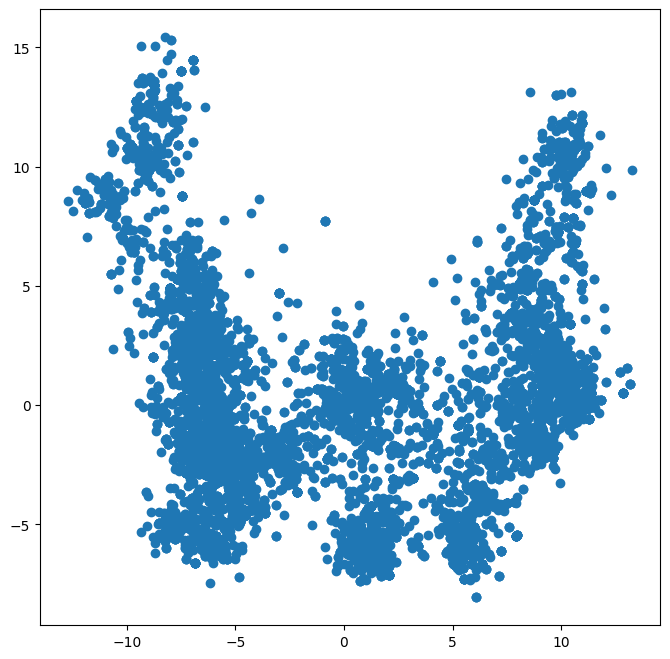

In [8]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.scatter(principalDf.loc[:, 'principal component 1']
               , principalDf.loc[:, 'principal component 2'])

In [9]:
pca.explained_variance_ratio_

array([0.04564007, 0.02299862, 0.01997602])

In [7]:
montab = pd.read_csv("mabs_assemblies/final_trash/All_centromere_repeats_kindapAge1.bed", sep="\t", header=None)
montab.head()

/tmp/ipykernel_7802/1332853254.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  montab = pd.read_csv("mabs_assemblies/final_trash/All_centromere_repeats_kindapAge1.bed", sep="\t", header=None)


AttributeError: '_io.TextIOWrapper' object has no attribute 'head'

In [17]:
montab.head()

,0,1,2,3,4,5,kmers
0,scaffold_1,17806201,17806366,166,CCTTACTACTACTTCCCAAATTTTTGTAAGTGAGGAAAGTCCCAAT...,AL08_v2,"{'CCTTA': 0.0030864197530864196, 'GGTTG': 0.00..."
1,scaffold_1,17806367,17806531,165,CCTTATTATAGGTTCCCCAAGTTTTGTAAGTAAGAACAAGTCCGTA...,AL08_v2,"{'CCTTA': 0.003105590062111801, 'TTGGG': 0.006..."
2,scaffold_1,17806532,17806697,166,CATTATTATTGCTTCCCCACGTTTTGTAAGCAAGGACAAAGTCCCT...,AL08_v2,"{'CATTA': 0.0030864197530864196, 'TTGGG': 0.00..."
3,scaffold_1,17806698,17806863,166,CCTTATTATTGCTTCTCCAAGTTTTGAAAGTAGGGACGAAGTCCCT...,AL08_v2,"{'CCTTA': 0.0030864197530864196, 'TTGGC': 0.00..."
4,scaffold_1,17806864,17807029,166,CCTTATTATTGCTTCCCAAATATTTGTAAGTGAGGACAAAGTCCCA...,AL08_v2,"{'CCTTA': 0.0030864197530864196, 'TTGGG': 0.00..."


In [13]:
montab["kmers"] = montab.iloc[:,4].apply(lambda x: simple_rev(x,5))

In [16]:
kmertab = montab["kmers"].apply(pd.Series)

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["scaffold_1", "scaffold_2", "scaffold_3", "scaffold_4", "scaffold_5", "scaffold_6", 'scaffold_7', "scaffold_8"]
colors = ['#E41A1C', '#377EB8', '#4DAf4A', '#984EA3', '#FF7F00', '#A65628', '#F781BF', 'r', 'g', 'b', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = montab_work.loc[:,0] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = color , s = 50)
ax.legend(targets)
ax.grid()

fig = plt.figure(figsize = (8,8))

#ax.set_xlabel('Principal Component 1', fontsize = 15)
#ax.set_ylabel('Principal Component 2', fontsize = 15)
#ax.set_title('2 component PCA', fontsize = 20)
targets = ["scaffold_1", "scaffold_2", "scaffold_3", "scaffold_4", "scaffold_5", "scaffold_6", 'scaffold_7', "scaffold_8"]
colors = ['#E41A1C', '#377EB8', '#4DAf4A', '#984EA3', '#FF7F00', '#A65628', '#F781BF', 'r', 'g', 'b', 'black', '#DA073B', "#DBA507", "#8EC7D2", "#0D6986", "#07485B"]
lyrata = ["AL08", "BOR", "NT1", "PTP","MN47", "TE8", "NT12", "PU6", 'BAM12', 'NT8', "NT9", 'TE4', 'TE11', 'WS1', 'al1']
cebped = ["Ceb_c", "Ceb_d", "Ped"]
are = ["ASS3AA"]
n = 1
for target, color in zip(targets,colors):
    ax = fig.add_subplot(2,4,n)
    n += 1
    indicesToKeep = (montab.loc[:,3] == target) & (montab.loc[:,4].isin(lyrata))
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = 'green' , s = 50)
    indicesToKeep = (montab.loc[:,3] == target) & (montab.loc[:,4].isin(cebped))
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = 'orange' , s = 50)
    indicesToKeep = (montab.loc[:,3] == target) & (montab.loc[:,4].isin(are))
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = 'red' , s = 50)
    plt.xlim([-15, 25])
    plt.ylim([-20, 20])
#targets = [, "Ceb_c", "Ceb_d", "A_ped"]
targets = []
colors = ['#E41A1C', '#377EB8', '#4DAf4A', '#984EA3', '#FF7F00', '#A65628', '#F781BF', 'r', 'g', 'b', 'black']

In [ ]:
fig = plt.figure(figsize = (8,8))
targets = ["AL08", "BOR", "NT1", "PTP","MN47", "TE8", "NT12", "PU6", 'BAM12', 'NT8', "NT9", 'TE4', 'TE11', 'WS1', 'al1']
colors = ['#E41A1C', '#377EB8', '#4DAf4A', '#984EA3', '#FF7F00', '#A65628', '#F781BF', 'r', 'g', 'b', 'black', '#DA073B', "#DBA507", "#8EC7D2", "#0D6986", "#07485B"]
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
for target, color in zip(targets,colors):
    indicesToKeep = montab_work.loc[:,4] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = color , s = 50)
ax.legend(targets)
ax.grid()


In [ ]:
n = 1

    ax = fig.add_subplot(1,1,1)
    n += 1
    indicesToKeep = (montab_work.loc[:,4].isin(lyrata))
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = 'green' , s = 50)
    indicesToKeep =  (montab_work.loc[:,4].isin(cebped))
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = 'orange' , s = 50)
    indicesToKeep =  (montab_work.loc[:,4].isin(are))
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = 'red' , s = 50)
    plt.xlim([-15, 25])
    plt.ylim([-20, 20])

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ["scaffold_1", "scaffold_2", "scaffold_3", "scaffold_4", "scaffold_5", "scaffold_6", 'scaffold_7', "scaffold_8"]
colors = ['#E41A1C', '#377EB8', '#4DAf4A', '#984EA3', '#FF7F00', '#A65628', '#F781BF', 'r', 'g', 'b', 'black']
for target, color in zip(targets,colors):
    indicesToKeep = montab.loc[:,3] == target
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = color , s = 50)
ax.legend(targets)
ax.grid()
lyrata = ["AL08_v2", "BOR_v1", "NT1_v2", "PTP_v0","MN47_v4", "TE8_v1", "NT12_v2", "PU6_v3", 'BAM12_v2', 'NT8_v2', "NT9_v2", 'TE4_v1', 'TE11_v2', 'WS1_v2', 'al1_v2']
cebped = ["Ceb_c_v1", "Ceb_d_v2", "Ped_v2"]


In [ ]:

for target, color in zip(targets,colors):
    ax = fig.add_subplot(4,4,n)
    n += 1
    indicesToKeep = (montab_work.loc[:,4] == target)
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = color , s = 50)
    plt.xlim([-10, 25])
    plt.ylim([-15, 20])

In [ ]:
for target, color in zip(targets,colors):
    ax = fig.add_subplot(2,2,n)
    n += 1
    indicesToKeep = (montab_work.loc[:,4] == target)
    ax.scatter(principalDf.loc[indicesToKeep, 'principal component 1'], principalDf.loc[indicesToKeep, 'principal component 2'], c = color , s = 50)
    plt.xlim([-10, 25])
    plt.ylim([-15, 20])

In [4]:
repeat_all.shape

(558370, 169)

In [11]:
for i in range(1,9):
    na = "al1_scaffold_" + str(i)
    print(len(repeat_all[repeat_all[na] > 0]))

3632
2341
1554
3277
3876
4151
3040
2021


In [12]:
nre = 0
for i in range(1,9):
    na = "al1_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

23892

In [13]:
nre = 0
for i in range(1,9):
    na = "WS1_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

26215

In [14]:
nre = 0
for i in range(1,9):
    na = "NT1_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

33154

In [15]:
nre = 0
for i in range(1,9):
    na = "AL08_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

29227

In [16]:
nre = 0
for i in range(1,9):
    na = "AL27_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

29886

In [17]:
nre = 0
for i in range(1,9):
    na = "BOR_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

29454

In [18]:
nre = 0
for i in range(1,9):
    na = "BAM12_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

32013

In [19]:
nre = 0
for i in range(1,9):
    na = "Ceb_c_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

50475

In [20]:
nre = 0
for i in range(1,9):
    na = "Ceb_d_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

45392

In [21]:
nre = 0
for i in range(1,9):
    na = "Ped_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

47318

In [22]:
nre = 0
for i in range(1,9):
    na = "LPT_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

21672

In [23]:
nre = 0
for i in range(1,9):
    na = "PTP_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

22869

In [24]:
nre = 0
for i in range(1,9):
    na = "TSS_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

23019

In [25]:
nre = 0
for i in range(1,9):
    na = "PU6_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

24092

In [26]:
nre = 0
for i in range(1,9):
    na = "TE8_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

26170

In [27]:
nre = 0
for i in range(1,9):
    na = "NT12_scaffold_" + str(i)
    nre += (len(repeat_all[repeat_all[na] > 0]))
nre

27279

In [77]:
sc_1 = repeat_all.filter(like='scaffold_8', axis=1)

In [78]:
sc_1.dropna(thresh=1)

,al1_scaffold_8,AL08_scaffold_8,AL27_scaffold_8,BOR_scaffold_8,BAM12_scaffold_8,Ceb_c_scaffold_8,Ceb_d_scaffold_8,PTP_scaffold_8,LPT_scaffold_8,TSS_scaffold_8,...,NT1_scaffold_8,NT12_scaffold_8,NT8_scaffold_8,NT9_scaffold_8,PU6_scaffold_8,TE11_scaffold_8,TE4_scaffold_8,TE8_scaffold_8,Ped_scaffold_8,WS1_scaffold_8
21871,239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,107.0,4.0,8.0,NaN,NaN,72.0,NaN,NaN
21872,116.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21873,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,114.0,96.0,233.0,NaN,NaN,109.0,NaN,NaN
21874,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN
21875,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
558366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
558367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
558368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0


In [79]:
sc_1.dropna(thresh=2)

,al1_scaffold_8,AL08_scaffold_8,AL27_scaffold_8,BOR_scaffold_8,BAM12_scaffold_8,Ceb_c_scaffold_8,Ceb_d_scaffold_8,PTP_scaffold_8,LPT_scaffold_8,TSS_scaffold_8,...,NT1_scaffold_8,NT12_scaffold_8,NT8_scaffold_8,NT9_scaffold_8,PU6_scaffold_8,TE11_scaffold_8,TE4_scaffold_8,TE8_scaffold_8,Ped_scaffold_8,WS1_scaffold_8
21871,239.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,107.0,4.0,8.0,NaN,NaN,72.0,NaN,NaN
21873,113.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,114.0,96.0,233.0,NaN,NaN,109.0,NaN,NaN
21874,101.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.0,4.0,NaN,NaN,NaN,1.0,NaN,NaN
21875,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,14.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
21876,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,118.0,168.0,NaN,NaN,NaN,69.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,1.0
484627,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
485185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
502194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0


In [35]:
sc_1.dropna(thresh=3)

,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,TSS_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1
236,8.0,16.0,29.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
316,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,126.0,122.0,112.0,NaN,NaN
1985,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,7.0,2.0,NaN,NaN
23955,NaN,20.0,7.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24027,NaN,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.0,26.0,19.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442333,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
442342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN
442366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
442383,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,2.0,1.0,NaN,NaN


In [36]:
sc_1.dropna(thresh=4)

,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,TSS_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1
236,8.0,16.0,29.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
316,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,126.0,122.0,112.0,NaN,NaN
1985,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,4.0,7.0,2.0,NaN,NaN
24027,NaN,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.0,26.0,19.0,NaN,NaN
54276,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.0,20.0,17.0,9.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,3.0,NaN,NaN
418352,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,12.0,12.0,6.0,NaN,NaN
418362,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,2.0,NaN,NaN
418369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN


In [37]:
sc_1.dropna(thresh=5)

,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,TSS_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1
236,8.0,16.0,29.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
316,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,7.0,126.0,122.0,112.0,NaN,NaN
24027,NaN,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.0,26.0,19.0,NaN,NaN
54276,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,31.0,20.0,17.0,9.0,NaN,NaN
110042,NaN,NaN,NaN,NaN,351.0,NaN,NaN,NaN,NaN,NaN,...,NaN,53.0,347.0,41.0,NaN,NaN,NaN,NaN,NaN,292.0
110044,NaN,NaN,NaN,NaN,189.0,NaN,NaN,NaN,NaN,NaN,...,NaN,48.0,114.0,49.0,NaN,NaN,NaN,NaN,NaN,112.0
110046,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,14.0,...,NaN,2.0,152.0,2.0,NaN,NaN,NaN,NaN,NaN,77.0
110072,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,4.0,1.0,...,NaN,191.0,29.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
110085,NaN,NaN,NaN,NaN,24.0,NaN,NaN,NaN,NaN,NaN,...,NaN,32.0,22.0,39.0,NaN,NaN,NaN,NaN,NaN,1.0
110109,NaN,NaN,NaN,NaN,19.0,NaN,NaN,4.0,NaN,NaN,...,NaN,3.0,40.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0


In [38]:
sc_1.dropna(thresh=6)

,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,TSS_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1
24027,NaN,12.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,26.0,26.0,19.0,NaN,NaN
110046,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,14.0,...,NaN,2.0,152.0,2.0,NaN,NaN,NaN,NaN,NaN,77.0
110072,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,4.0,1.0,...,NaN,191.0,29.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
110109,NaN,NaN,NaN,NaN,19.0,NaN,NaN,4.0,NaN,NaN,...,NaN,3.0,40.0,1.0,NaN,NaN,NaN,NaN,NaN,1.0
232319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,295.0,192.0,9.0,...,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
232336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.0,16.0,2.0,...,NaN,1.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,NaN
234714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1.0,...,NaN,2.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,11.0


In [39]:
sc_1.dropna(thresh=7)

,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,TSS_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1
110046,NaN,NaN,NaN,NaN,138.0,NaN,NaN,NaN,NaN,14.0,...,NaN,2.0,152.0,2.0,NaN,NaN,NaN,NaN,NaN,77.0
110072,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,4.0,1.0,...,NaN,191.0,29.0,36.0,NaN,NaN,NaN,NaN,NaN,NaN
234714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,1.0,...,NaN,2.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,11.0


In [40]:
sc_1.dropna(thresh=8)

,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,TSS_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1


In [41]:
sc_1.dropna(thresh=9)

,al1_scaffold_1,AL08_scaffold_1,AL27_scaffold_1,BOR_scaffold_1,BAM12_scaffold_1,Ceb_c_scaffold_1,Ceb_d_scaffold_1,PTP_scaffold_1,LPT_scaffold_1,TSS_scaffold_1,...,NT1_scaffold_1,NT12_scaffold_1,NT8_scaffold_1,NT9_scaffold_1,PU6_scaffold_1,TE11_scaffold_1,TE4_scaffold_1,TE8_scaffold_1,Ped_scaffold_1,WS1_scaffold_1


In [44]:
sc_1.dropna(thresh=10)

,al1_scaffold_2,AL08_scaffold_2,AL27_scaffold_2,BOR_scaffold_2,BAM12_scaffold_2,Ceb_c_scaffold_2,Ceb_d_scaffold_2,PTP_scaffold_2,LPT_scaffold_2,TSS_scaffold_2,...,NT1_scaffold_2,NT12_scaffold_2,NT8_scaffold_2,NT9_scaffold_2,PU6_scaffold_2,TE11_scaffold_2,TE4_scaffold_2,TE8_scaffold_2,Ped_scaffold_2,WS1_scaffold_2
3634,159.0,10.0,12.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,21.0,1.0,61.0,NaN,8.0,10.0,NaN,1.0
3639,69.0,69.0,2.0,122.0,6.0,NaN,NaN,405.0,373.0,58.0,...,NaN,NaN,243.0,129.0,14.0,NaN,101.0,129.0,NaN,4.0
3889,5.0,4.0,NaN,76.0,NaN,NaN,NaN,6.0,13.0,27.0,...,NaN,NaN,4.0,4.0,1.0,NaN,7.0,8.0,NaN,NaN
28267,NaN,48.0,6.0,84.0,3.0,NaN,NaN,NaN,NaN,5.0,...,NaN,NaN,117.0,47.0,NaN,NaN,88.0,79.0,NaN,NaN
28354,NaN,16.0,22.0,3.0,NaN,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,40.0,49.0,NaN,NaN,88.0,76.0,NaN,NaN
29163,NaN,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,15.0,3.0,4.0,NaN,NaN,2.0,2.0,NaN,16.0
29824,NaN,2.0,NaN,115.0,NaN,NaN,NaN,3.0,8.0,26.0,...,11.0,2.0,NaN,NaN,NaN,NaN,15.0,16.0,NaN,NaN


In [45]:
sc_1.dropna(thresh=11)

,al1_scaffold_2,AL08_scaffold_2,AL27_scaffold_2,BOR_scaffold_2,BAM12_scaffold_2,Ceb_c_scaffold_2,Ceb_d_scaffold_2,PTP_scaffold_2,LPT_scaffold_2,TSS_scaffold_2,...,NT1_scaffold_2,NT12_scaffold_2,NT8_scaffold_2,NT9_scaffold_2,PU6_scaffold_2,TE11_scaffold_2,TE4_scaffold_2,TE8_scaffold_2,Ped_scaffold_2,WS1_scaffold_2
3639,69.0,69.0,2.0,122.0,6.0,NaN,NaN,405.0,373.0,58.0,...,NaN,NaN,243.0,129.0,14.0,NaN,101.0,129.0,NaN,4.0
3889,5.0,4.0,NaN,76.0,NaN,NaN,NaN,6.0,13.0,27.0,...,NaN,NaN,4.0,4.0,1.0,NaN,7.0,8.0,NaN,NaN


In [46]:
sc_1.dropna(thresh=12)

,al1_scaffold_2,AL08_scaffold_2,AL27_scaffold_2,BOR_scaffold_2,BAM12_scaffold_2,Ceb_c_scaffold_2,Ceb_d_scaffold_2,PTP_scaffold_2,LPT_scaffold_2,TSS_scaffold_2,...,NT1_scaffold_2,NT12_scaffold_2,NT8_scaffold_2,NT9_scaffold_2,PU6_scaffold_2,TE11_scaffold_2,TE4_scaffold_2,TE8_scaffold_2,Ped_scaffold_2,WS1_scaffold_2
3639,69.0,69.0,2.0,122.0,6.0,NaN,NaN,405.0,373.0,58.0,...,NaN,NaN,243.0,129.0,14.0,NaN,101.0,129.0,NaN,4.0
3889,5.0,4.0,NaN,76.0,NaN,NaN,NaN,6.0,13.0,27.0,...,NaN,NaN,4.0,4.0,1.0,NaN,7.0,8.0,NaN,NaN


In [50]:
sc_1.dropna(thresh=16)

,al1_scaffold_2,AL08_scaffold_2,AL27_scaffold_2,BOR_scaffold_2,BAM12_scaffold_2,Ceb_c_scaffold_2,Ceb_d_scaffold_2,PTP_scaffold_2,LPT_scaffold_2,TSS_scaffold_2,...,NT1_scaffold_2,NT12_scaffold_2,NT8_scaffold_2,NT9_scaffold_2,PU6_scaffold_2,TE11_scaffold_2,TE4_scaffold_2,TE8_scaffold_2,Ped_scaffold_2,WS1_scaffold_2


In [51]:
sc_1.dropna(thresh=17)

,al1_scaffold_2,AL08_scaffold_2,AL27_scaffold_2,BOR_scaffold_2,BAM12_scaffold_2,Ceb_c_scaffold_2,Ceb_d_scaffold_2,PTP_scaffold_2,LPT_scaffold_2,TSS_scaffold_2,...,NT1_scaffold_2,NT12_scaffold_2,NT8_scaffold_2,NT9_scaffold_2,PU6_scaffold_2,TE11_scaffold_2,TE4_scaffold_2,TE8_scaffold_2,Ped_scaffold_2,WS1_scaffold_2


In [49]:
sc_1.dropna(thresh=15)

,al1_scaffold_2,AL08_scaffold_2,AL27_scaffold_2,BOR_scaffold_2,BAM12_scaffold_2,Ceb_c_scaffold_2,Ceb_d_scaffold_2,PTP_scaffold_2,LPT_scaffold_2,TSS_scaffold_2,...,NT1_scaffold_2,NT12_scaffold_2,NT8_scaffold_2,NT9_scaffold_2,PU6_scaffold_2,TE11_scaffold_2,TE4_scaffold_2,TE8_scaffold_2,Ped_scaffold_2,WS1_scaffold_2
3639,69.0,69.0,2.0,122.0,6.0,NaN,NaN,405.0,373.0,58.0,...,NaN,NaN,243.0,129.0,14.0,NaN,101.0,129.0,NaN,4.0


In [55]:
repeat_all.dropna(thresh=16)

,sequence,al1_scaffold_1,al1_scaffold_2,al1_scaffold_3,al1_scaffold_4,al1_scaffold_5,al1_scaffold_6,al1_scaffold_7,al1_scaffold_8,AL08_scaffold_1,...,Ped_scaffold_7,Ped_scaffold_8,WS1_scaffold_1,WS1_scaffold_2,WS1_scaffold_3,WS1_scaffold_4,WS1_scaffold_5,WS1_scaffold_6,WS1_scaffold_7,WS1_scaffold_8
3639,AAGCTTATTATGGCTTTCCCAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
21881,AAGCTTATTATGGCTTCTCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [59]:
repeat_all.dropna(thresh=12)

,sequence,al1_scaffold_1,al1_scaffold_2,al1_scaffold_3,al1_scaffold_4,al1_scaffold_5,al1_scaffold_6,al1_scaffold_7,al1_scaffold_8,AL08_scaffold_1,...,Ped_scaffold_7,Ped_scaffold_8,WS1_scaffold_1,WS1_scaffold_2,WS1_scaffold_3,WS1_scaffold_4,WS1_scaffold_5,WS1_scaffold_6,WS1_scaffold_7,WS1_scaffold_8
3639,AAGCTTATTATGGCTTTCCCAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
3889,AAGCTTATTATGGCTTTCCCAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7527,TTGGTTCTCAAAGCTTTGTGGGTGTGGCCAAAGTCCTATGAGTTTT...,NaN,NaN,NaN,194.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN
7605,TTGGTTCTCAAAGCTTTGTGAGTGTAGCCGAAGTCCTATGAGTTTT...,NaN,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN
10818,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,55.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
10855,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,29.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN
10886,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,21.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN
21877,AAGCTTATTATGGCTTCTCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0
21881,AAGCTTATTATGGCTTCTCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
125702,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
repeat_all["sc1_sum"][sc_1.sum(axis=1) > 0] = 1

/tmp/ipykernel_201031/3342074209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repeat_all["sc1_sum"][sc_1.sum(axis=1) > 0] = 1


In [105]:
repeat_all["sc1_sum"] = 0

In [104]:
sc_1 = repeat_all.filter(like='scaffold_1', axis=1)

In [110]:
shared_repeats = repeat_all[(repeat_all["sc1_sum"] + repeat_all["sc2_sum"] + repeat_all["sc3_sum"] + repeat_all["sc4_sum"] + repeat_all["sc5_sum"] + repeat_all["sc6_sum"] + repeat_all["sc7_sum"] + repeat_all["sc8_sum"]) > 1]
            

In [109]:
repeat_all.shape

(558370, 177)

In [121]:
shared_repeats[shared_repeats.sc6_sum == 1]

,sequence,al1_scaffold_1,al1_scaffold_8,AL08_scaffold_1,AL08_scaffold_3,AL08_scaffold_8,AL27_scaffold_1,AL27_scaffold_3,AL27_scaffold_8,BOR_scaffold_1,...,WS1_scaffold_6,WS1_scaffold_8,sc8_sum,sc7_sum,sc6_sum,sc5_sum,sc4_sum,sc3_sum,sc2_sum,sc1_sum
107560,AAGCTTATTATGGCTTCTCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1,0,1,0,0,0,0,0
141468,AAGCTTATTATGGCTTCCCAAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,0,0,0,0,1
141745,AAGCTTATTATGGCTTCCCCAAGTTTTATAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,0,0,0,0,1
155687,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,0,0,1,0,0
155689,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177667,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,1,0,0,0,0
210020,AAGCTTATTATGGCTTCCCCAAGTTTTGTAAGGGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,1,0,0,0,0
335406,AAGCTTATTATGGCTTTCCTAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,0,0,0,1,0
335558,AAGCTTATTATGGCTTTCCTAAGTTTTGTAAGTGAGGACGAAGTCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,1,0,0,0,1,0


In [122]:
shared_repeats[shared_repeats.sc6_sum == 1].sum()

sequence            AAGCTTATTATGGCTTCTCCAAGTTTTGTAAGGGAGGACGAAGTCC...
al1_scaffold_1                                                    0.0
al1_scaffold_8                                                    0.0
AL08_scaffold_1                                                   0.0
AL08_scaffold_3                                                   0.0
AL08_scaffold_8                                                   0.0
AL27_scaffold_1                                                   0.0
AL27_scaffold_3                                                   0.0
AL27_scaffold_8                                                   0.0
BOR_scaffold_1                                                    0.0
BOR_scaffold_3                                                    0.0
BOR_scaffold_8                                                    2.0
BAM12_scaffold_2                                                  0.0
BAM12_scaffold_8                                                  0.0
Ceb_c_scaffold_1    

In [120]:
shared_repeats = shared_repeats.dropna(axis=1, thresh=1)